**theortical**

q.1 hat is Unsupervised Learning in Machine Learning?

Unsupervised learning is a type of machine learning where the model is trained on unlabeled data. It aims to uncover hidden patterns or structures, such as clusters or associations, without predefined outcomes or targets.



q.2 How does K-Means Clustering Algorithm Work?

K-Means works by:

Choosing k cluster centers (centroids).

Assigning each data point to the nearest centroid.

Recalculating centroids as the mean of assigned points.

Repeating steps 2 and 3 until convergence (no change in assignments or centroids).



q.3 Explain the Concept of a Dendrogram in Hierarchical Clustering

A dendrogram is a tree-like diagram that visualizes the sequence of merges or splits in hierarchical clustering. The height of each branch represents the distance between clusters being merged.

q.4 What is the Main Difference Between K-Means and Hierarchical Clustering?

K-Means: Requires specifying the number of clusters (k), is fast, and works well with large datasets.

Hierarchical Clustering: Builds a hierarchy of clusters without needing k upfront, but is more computationally expensive.

q.5
What are the Advantages of DBSCAN Over K-Means?
No need to specify the number of clusters.


Can detect arbitrary-shaped clusters.

Identifies noise/outliers.

Works better with data of varying densities.

q.6When Would You Use Silhouette Score in Clustering?

Use the Silhouette Score to evaluate how well points fit within their cluster versus other clusters. It helps determine the optimal number of clusters and the quality of clustering.

q.7  What are the Limitations of Hierarchical Clustering?

Not scalable to very large datasets.

Sensitive to noise and outliers.

Irreversible decisions: once merged or split, cannot be undone.

Q.8  Why is Feature Scaling Important in Clustering Algorithms Like K-Means?

Clustering algorithms rely on distance metrics (e.g., Euclidean distance). If features are not scaled, variables with larger magnitudes dominate the clustering process.

Q.9 How Does DBSCAN Identify Noise Points?

DBSCAN labels a point as noise if it is not a
 core point (insufficient nearby points) and not within the ε-neighborhood of any core point.



Q.10 Define Inertia in the Context of K-Means

Inertia is the sum of squared distances of samples to their nearest cluster center. Lower inertia means tighter clusters.



Q.11 What is the Elbow Method in K-Means Clustering?

The elbow method plots inertia vs. number of clusters (k). The "elbow" point, where the decrease in inertia slows, suggests the optimal k.

Q.12 Describe the Concept of "Density" in DBSCAN

Density in DBSCAN refers to the number of points within a given radius (ε). A core point has at least min_samples points in its neighborhood.

Q.13  Can Hierarchical Clustering Be Used on Categorical Data?

Yes, but it requires a distance metric suitable for categorical data, like Hamming distance or Gower distance.

q.14What Does a Negative Silhouette Score Indicate?

A negative Silhouette Score means a point is likely misclassified, being closer to a different cluster than the one it was assigned to.



Q.15  Explain the Term "Linkage Criteria" in Hierarchical Clustering

Linkage criteria define how to calculate the distance between clusters:

Single linkage: min distance

Complete linkage: max distance

Average linkage: average distance

Ward's method: minimizes variance

Q.16 Why Might K-Means Perform Poorly on Data with Varying Cluster Sizes or Densities?


K-Means assumes clusters are spherical and equally sized. It struggles with:

Varying densities

Different shapes

Unequal cluster sizes



Q.17 What Are the Core Parameters in DBSCAN, and How Do They Influence Clustering?

ε (epsilon): Neighborhood radius.

min_samples: Minimum points to form a dense region. Together, they determine core points, noise, and cluster shapes.

Q.18 How Does K-Means++ Improve Upon Standard K-Means Initialization?

K-Means++ chooses initial centroids more strategically to reduce chances of poor convergence and improve accuracy.



q.19 What is Agglomerative Clustering?

Agglomerative clustering is a bottom-up hierarchical method. It starts with each point as its own cluster and merges the closest pairs until one or a few clusters remain.

Q.20 What Makes Silhouette Score a Better Metric than Just Inertia for Model Evaluation?

Inertia always decreases with more clusters and may mislead.

Silhouette Score balances cohesion (tight within-cluster distance) and separation (between-cluster distance), offering a clearer quality measure.



**practical**

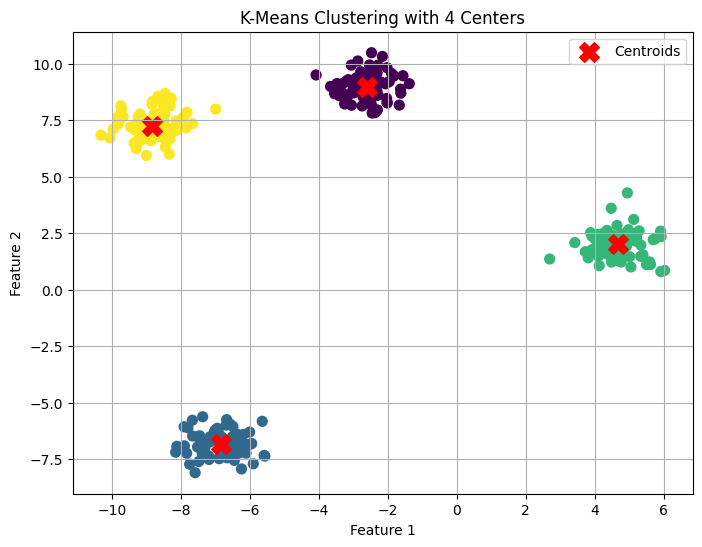

In [1]:
#Q>1
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Step 1: Generate synthetic data with 4 centers
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

# Step 2: Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Step 3: Visualize the results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=200, c='red', marker='X', label='Centroids')
plt.title("K-Means Clustering with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


In [2]:
#Q.2
from sklearn.datasets import load_iris
from sklearn.cluster import AgglomerativeClustering

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Apply Agglomerative Clustering
agg_cluster = AgglomerativeClustering(n_clusters=3)
labels = agg_cluster.fit_predict(X)

# Display the first 10 predicted labels
print("First 10 predicted labels:", labels[:10])


First 10 predicted labels: [1 1 1 1 1 1 1 1 1 1]


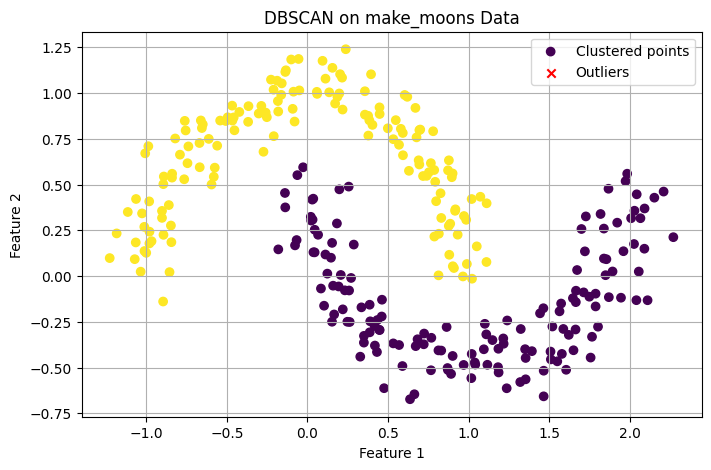

In [3]:
#Q,3
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generate synthetic data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plotting
plt.figure(figsize=(8, 5))

# Plot clustered points
plt.scatter(X[labels != -1][:, 0], X[labels != -1][:, 1],
            c=labels[labels != -1], cmap='viridis', label='Clustered points')

# Plot outliers
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1],
            color='red', marker='x', label='Outliers')

plt.title('DBSCAN on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [4]:
#Q.4
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

# Load the Wine dataset
wine = load_wine()
X = wine.data

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Calculate and print the size of each cluster
unique, counts = np.unique(labels, return_counts=True)
cluster_sizes = dict(zip(unique, counts))

print("Cluster sizes:")
for cluster_id, size in cluster_sizes.items():
    print(f"Cluster {cluster_id}: {size} samples")


Cluster sizes:
Cluster 0: 65 samples
Cluster 1: 51 samples
Cluster 2: 62 samples


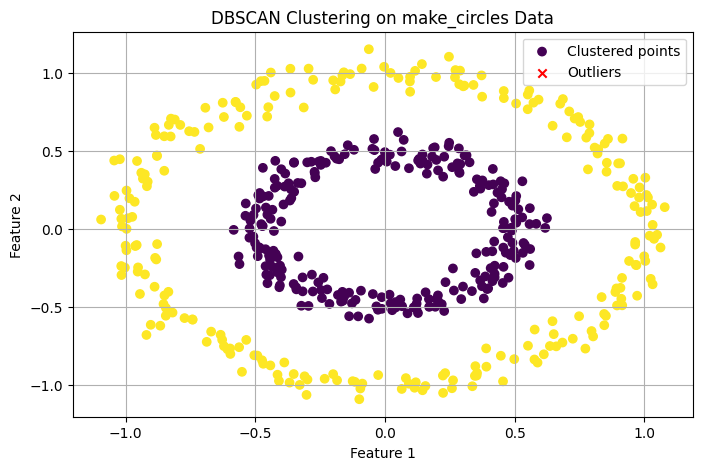

In [5]:
#Q.5 import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import DBSCAN

# Generate synthetic circular data
X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 5))

# Plot clustered points
plt.scatter(X[labels != -1][:, 0], X[labels != -1][:, 1],
            c=labels[labels != -1], cmap='viridis', label='Clustered points')

# Plot outliers
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1],
            color='red', marker='x', label='Outliers')

plt.title('DBSCAN Clustering on make_circles Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [6]:
#Q.6
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Apply MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Apply K-Means with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(X_scaled)

# Output the cluster centroids
print("Cluster centroids:")
print(kmeans.cluster_centers_)



Cluster centroids:
[[0.50483563 0.39560329 0.50578661 0.36376576 0.46988732 0.42226302
  0.41838662 0.46928035 0.45899738 0.29945886 0.19093085 0.19112073
  0.17903433 0.13086432 0.18017962 0.25890126 0.12542475 0.30942779
  0.190072   0.13266975 0.48047448 0.45107371 0.4655302  0.31460597
  0.49868817 0.36391461 0.39027292 0.65827197 0.33752296 0.26041387]
 [0.25535358 0.28833455 0.24696416 0.14388369 0.35743076 0.18019471
  0.10344776 0.1306603  0.34011829 0.25591606 0.06427485 0.18843043
  0.05975663 0.02870108 0.18158628 0.13242941 0.05821528 0.18069336
  0.17221057 0.08403996 0.2052406  0.32069002 0.19242138 0.09943446
  0.3571115  0.14873935 0.13142287 0.26231363 0.22639412 0.15437354]]


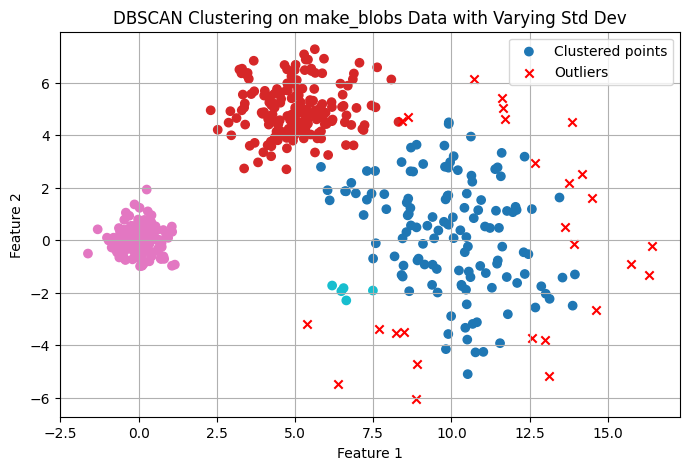

In [7]:
#Q.7
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN

# Generate synthetic data with varying cluster standard deviations
X, _ = make_blobs(n_samples=500,
                  centers=[[0, 0], [5, 5], [10, 0]],
                  cluster_std=[0.5, 1.0, 2.5],
                  random_state=42)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.0, min_samples=5)
labels = dbscan.fit_predict(X)

# Plot results
plt.figure(figsize=(8, 5))

# Clustered points
plt.scatter(X[labels != -1][:, 0], X[labels != -1][:, 1],
            c=labels[labels != -1], cmap='tab10', label='Clustered points')

# Outliers
plt.scatter(X[labels == -1][:, 0], X[labels == -1][:, 1],
            color='red', marker='x', label='Outliers')

plt.title("DBSCAN Clustering on make_blobs Data with Varying Std Dev")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


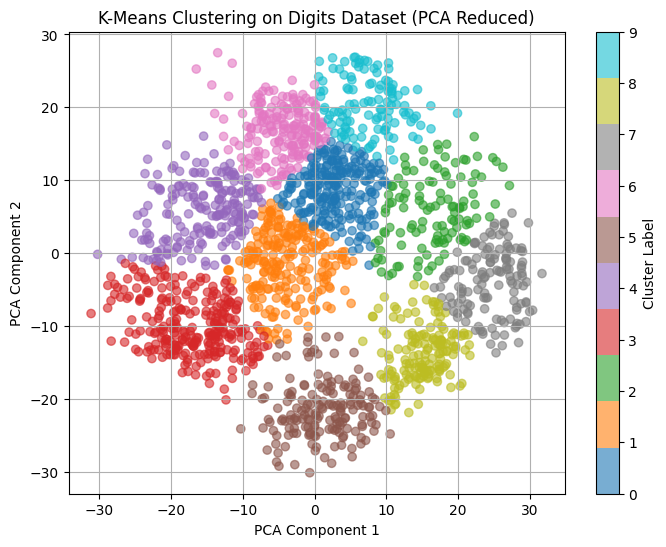

In [8]:
#Q.8 
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Digits dataset
digits = load_digits()
X = digits.data
y = digits.target

# Reduce dimensionality to 2D using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot the clustered data
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab10', alpha=0.6)
plt.title('K-Means Clustering on Digits Dataset (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(scatter, label='Cluster Label')
plt.grid(True)
plt.show()


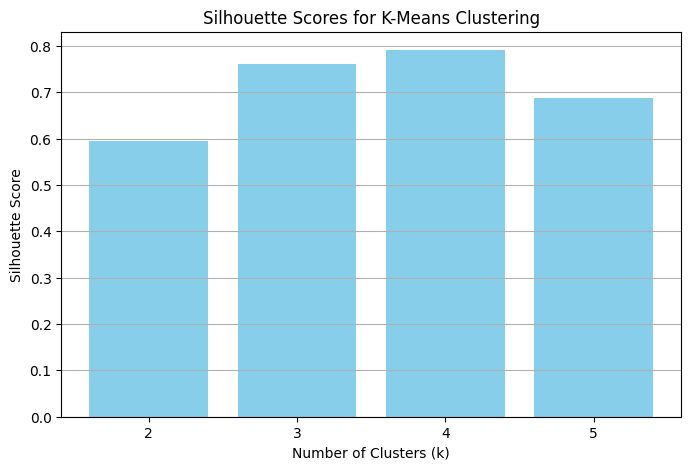

In [9]:
#Q.9
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Create synthetic data
X, _ = make_blobs(n_samples=500, centers=4, cluster_std=1.0, random_state=42)

# Evaluate silhouette scores for k = 2 to 5
silhouette_scores = []
k_values = range(2, 6)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

# Plot the silhouette scores as a bar chart
plt.figure(figsize=(8, 5))
plt.bar(k_values, silhouette_scores, color='skyblue')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(axis='y')
plt.show()


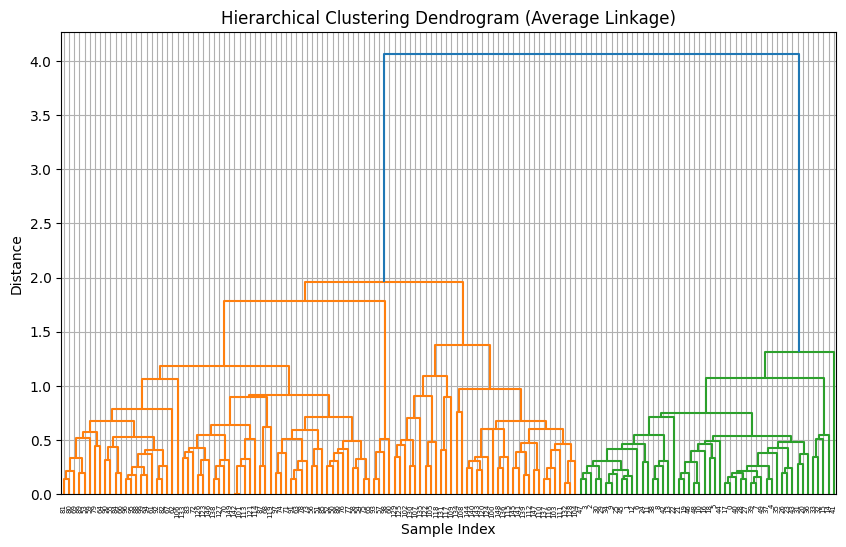

In [10]:
#Q.10
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris()
X = iris.data

# Compute linkage matrix using average linkage
linked = linkage(X, method='average')

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(linked,
           orientation='top',
           distance_sort='descending',
           show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Average Linkage)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.grid(True)
plt.show()


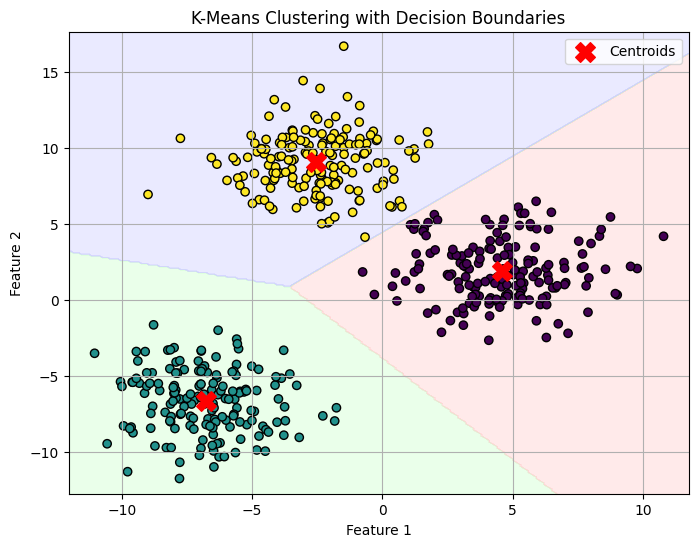

In [11]:
#Q.11
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from matplotlib.colors import ListedColormap

# Generate synthetic data with overlapping clusters
X, _ = make_blobs(n_samples=500, centers=3, cluster_std=2.0, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
labels = kmeans.predict(X)

# Create a mesh grid for plotting decision boundaries
h = 0.1  # step size in the mesh
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict cluster labels for each point in the mesh
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundary and points
plt.figure(figsize=(8, 6))
cmap_background = ListedColormap(['#FFCCCC', '#CCFFCC', '#CCCCFF'])
plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.4)

# Plot data points and centroids
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering with Decision Boundaries')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


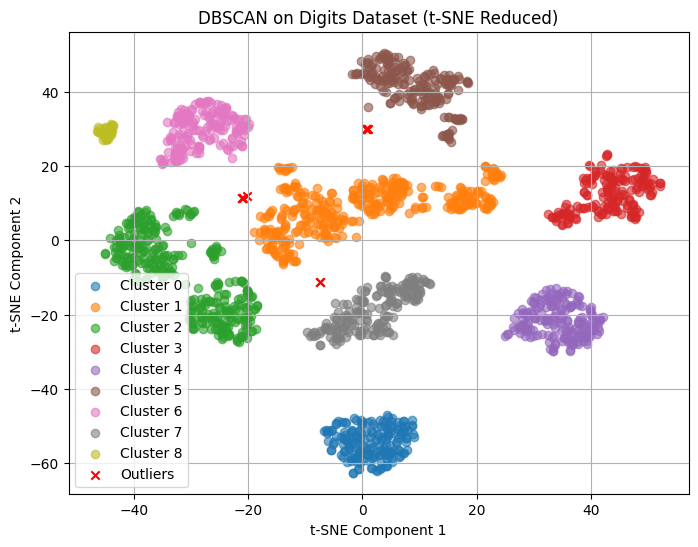

In [12]:
#Q.12 import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.cluster import DBSCAN

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce dimensions to 2D using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, init='pca')
X_tsne = tsne.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=5, min_samples=5)
labels = dbscan.fit_predict(X_tsne)

# Plot the clustering results
plt.figure(figsize=(8, 6))
unique_labels = set(labels)

for label in unique_labels:
    if label == -1:
        # Outliers
        plt.scatter(X_tsne[labels == label, 0], X_tsne[labels == label, 1],
                    color='red', marker='x', label='Outliers')
    else:
        plt.scatter(X_tsne[labels == label, 0], X_tsne[labels == label, 1],
                    label=f'Cluster {label}', alpha=0.6)

plt.title('DBSCAN on Digits Dataset (t-SNE Reduced)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend()
plt.grid(True)
plt.show()


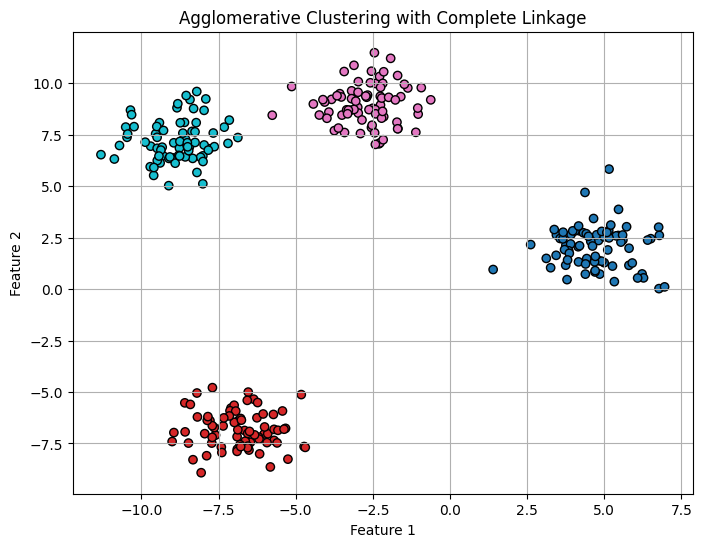

In [13]:
 #Q.13
 import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Apply Agglomerative Clustering with complete linkage
agg_clustering = AgglomerativeClustering(n_clusters=4, linkage='complete')
labels = agg_clustering.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='tab10', edgecolor='k')
plt.title('Agglomerative Clustering with Complete Linkage')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


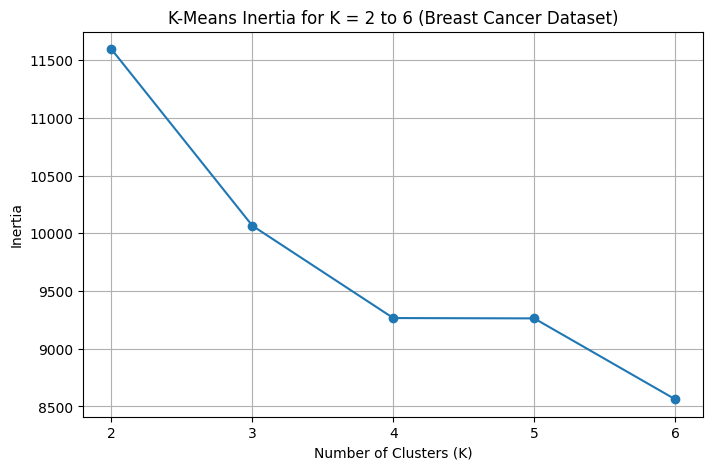

In [14]:
#Q.14
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the Breast Cancer dataset
data = load_breast_cancer()
X = data.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Compute inertia for K = 2 to 6
inertias = []
k_values = range(2, 7)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)

# Plot the inertia values
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertias, marker='o', linestyle='-')
plt.title('K-Means Inertia for K = 2 to 6 (Breast Cancer Dataset)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)
plt.xticks(k_values)
plt.show()


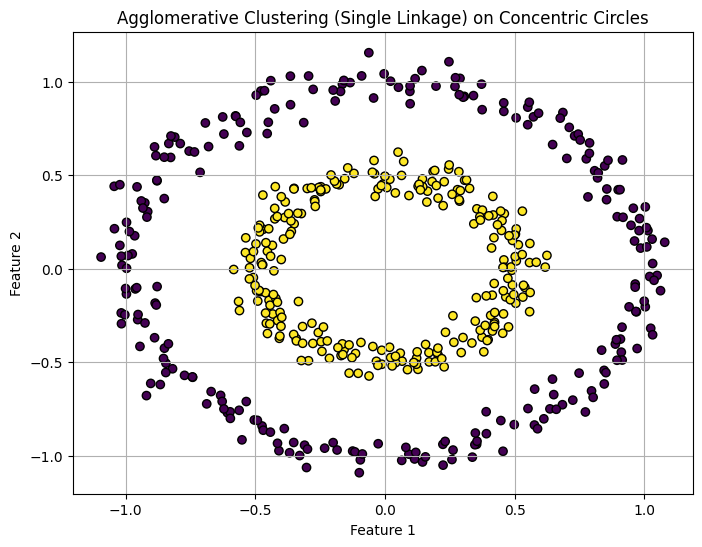

In [17]:
#Q.15
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.cluster import AgglomerativeClustering

# Generate concentric circles
X, _ = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=42)

# Apply Agglomerative Clustering with single linkage
agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='single')
labels = agg_clustering.fit_predict(X)

# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k')
plt.title('Agglomerative Clustering (Single Linkage) on Concentric Circles')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


In [18]:
#Q,16
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Wine dataset
data = load_wine()
X = data.data

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count number of clusters (excluding noise)
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)

print(f"Number of clusters (excluding noise): {n_clusters}")


Number of clusters (excluding noise): 0


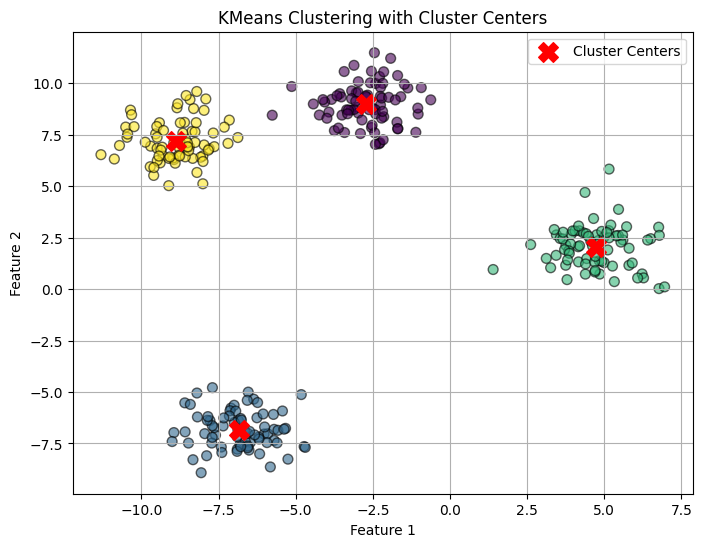

In [19]:
#Q.17 
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=1.0, random_state=42)

# Apply KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
labels = kmeans.fit_predict(X)
centers = kmeans.cluster_centers_

# Plot data points and cluster centers
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50, alpha=0.6)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', label='Cluster Centers')
plt.title('KMeans Clustering with Cluster Centers')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [20]:
#Q.18 
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# Load the Iris dataset
data = load_iris()
X = data.data

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply DBSCAN
dbscan = DBSCAN(eps=0.6, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Count number of noise samples (labeled as -1)
n_noise = np.sum(labels == -1)
print(f"Number of noise samples: {n_noise}")


Number of noise samples: 26


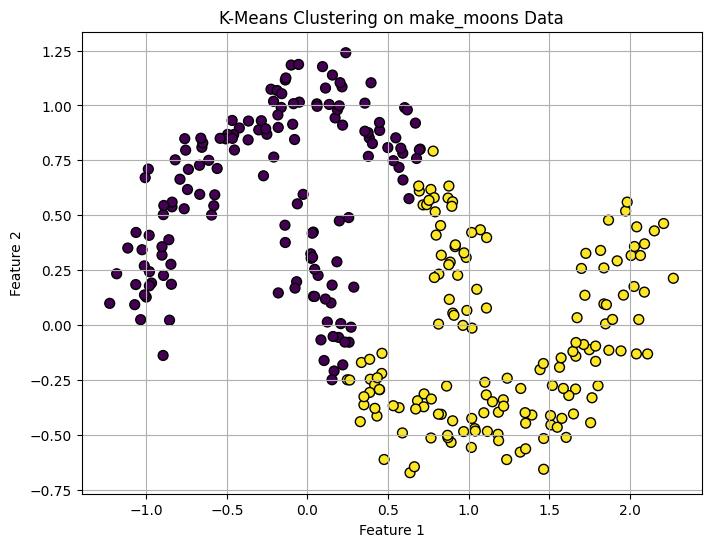

In [21]:
#Q.19
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import KMeans

# Generate synthetic non-linear data
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
labels = kmeans.fit_predict(X)

# Plot the clustering result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', edgecolor='k', s=50)
plt.title('K-Means Clustering on make_moons Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)
plt.show()


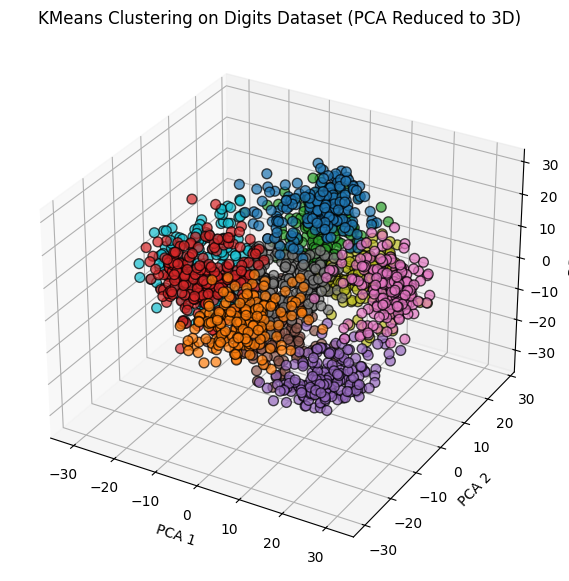

In [22]:
#Q.20
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Load the Digits dataset
digits = load_digits()
X = digits.data

# Reduce to 3 components using PCA
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X)

# Apply KMeans clustering
kmeans = KMeans(n_clusters=10, random_state=42)
labels = kmeans.fit_predict(X_pca)

# Plot 3D scatter
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(X_pca[:, 0], X_pca[:, 1], X_pca[:, 2],
                     c=labels, cmap='tab10', s=50, alpha=0.7, edgecolor='k')

ax.set_title('KMeans Clustering on Digits Dataset (PCA Reduced to 3D)')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.show()


**THANKYOU**